In [69]:
import pandas as pd
customers = pd.read_csv("C:/Users\prane\Downloads\mallcustomers.csv")

In [5]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
customers.describe(include ='all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

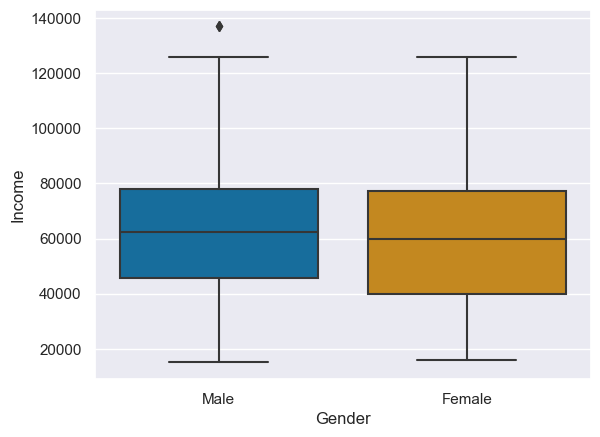

In [16]:
# to evaluate difference in income of males and females using boxplot
ax = sns.boxplot(data = customers,
                 x = 'Gender', 
                 y = 'Income', 
                 palette  = 'colorblind')

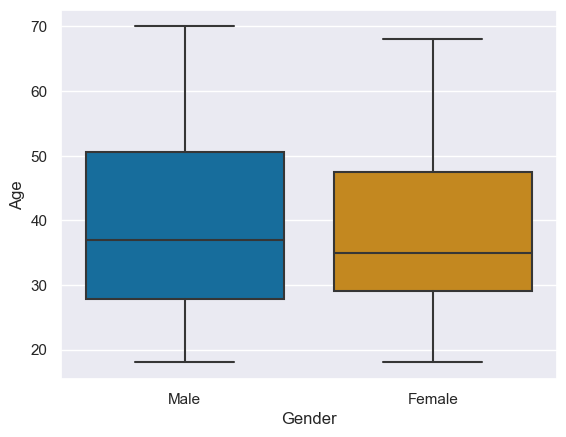

In [70]:
# Age and gender
ax = sns.boxplot(data = customers,
                 x = 'Gender', 
                 y = 'Age', 
                 palette  = 'colorblind')

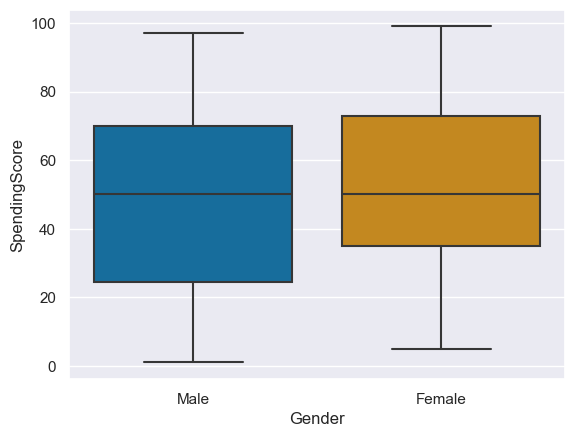

In [71]:
# Spending score and gender
ax = sns.boxplot(data = customers,
                 x = 'Gender', 
                 y = 'SpendingScore', 
                 palette  = 'colorblind')

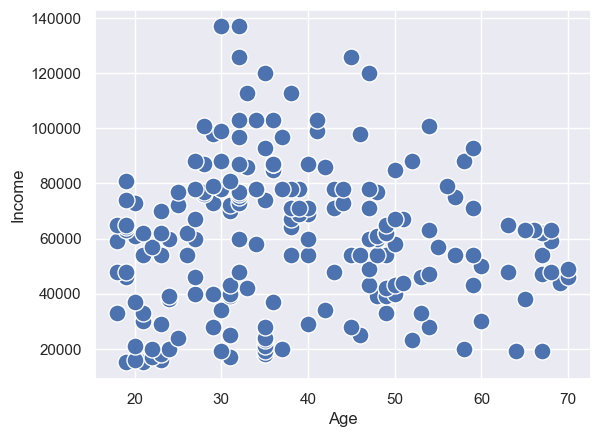

In [73]:
# Age and Income
ax = sns.scatterplot(data = customers,
                 x = 'Age', 
                 y = 'Income', 
                 s = 150)

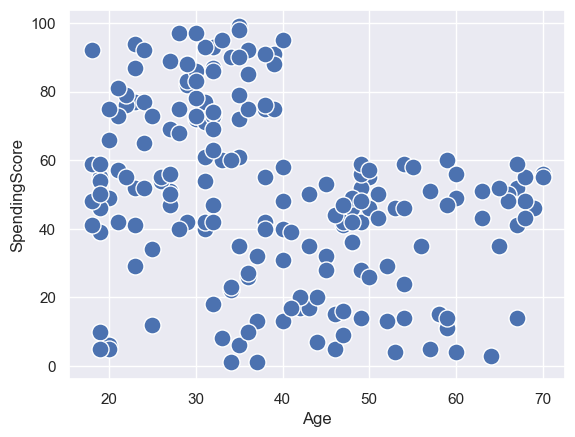

In [75]:
# Age and Spending Score
ax = sns.scatterplot(data = customers,
                 x = 'Age', 
                 y = 'SpendingScore', 
                 s = 150)

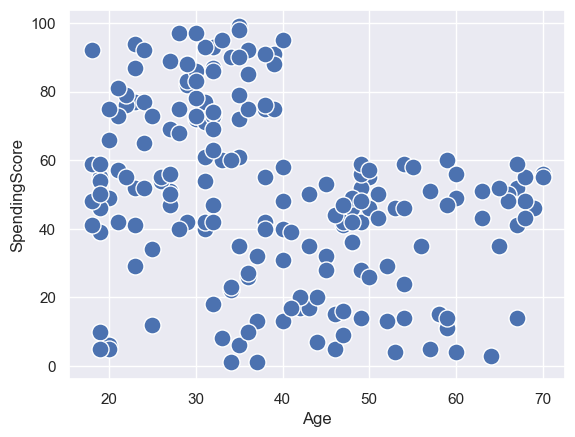

In [77]:
# Age and Spending score Scatter plot
ax = sns.scatterplot(data = customers,
                 x = 'Age', 
                 y = 'SpendingScore', 
                 s = 150)

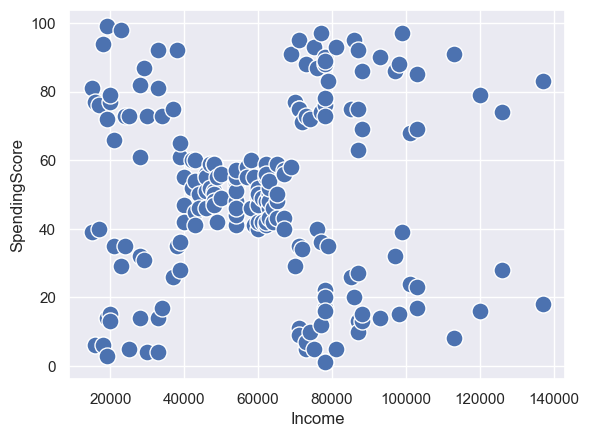

In [79]:
# Spending score and Income Scatter plot 
# No linear relation
ax = sns.scatterplot(data = customers,
                 y = 'SpendingScore', 
                 x = 'Income', 
                 s = 150)

In [20]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [22]:
#should normalise the these two features as Spending score will not have an impact on the process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [25]:
# Convert the scaled data to data frame to make process easy
customers_scaled = pd.DataFrame(customers_scaled, columns=['Income', 'SpendingScore'])

In [26]:
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


In [27]:
#This approach is called Z-score normalization

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 3, n_init = 25, random_state= 1234)
# number of time K means algorithm should run with different centroids is 25, default is 10

In [30]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [31]:
km.labels_
#to get cluster assignments we set labels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [32]:
km.inertia_
#Another useful attribute of km

157.70400815035947

In [34]:
### Evaluate and visualize clusters

In [37]:
# If single cluster is rather small or large compare to others it needs attention
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

In [39]:
# k might be unappropriated as 1 cluster is so big
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [41]:
# To interpret cluster centers easily
cluster_centers = pd.DataFrame(km.cluster_centers_ ,
                               columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


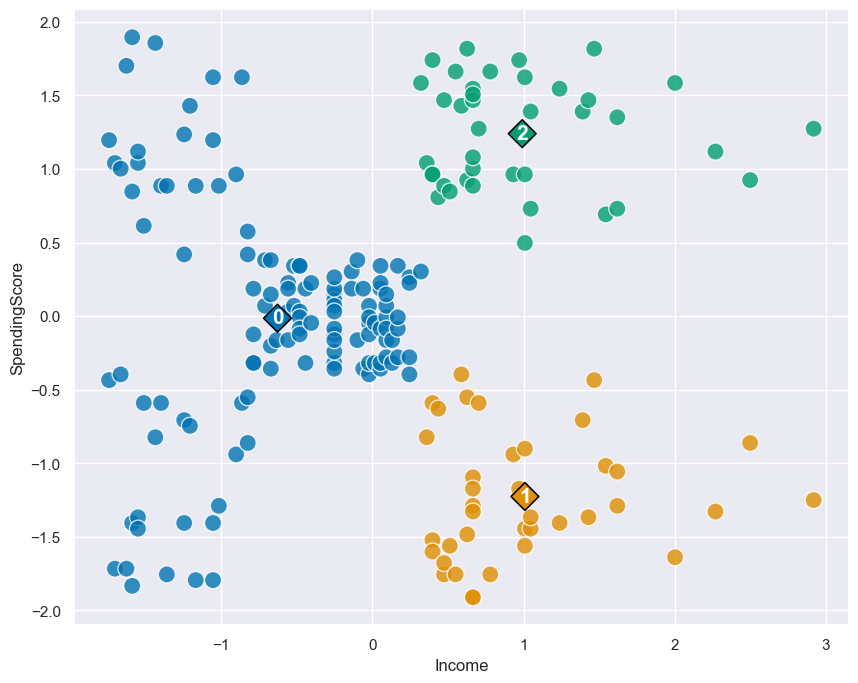

In [48]:
# Another way to check quality of clusters is by visualizing
plt.figure(figsize=(10, 8))

#plot the clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     palette= 'colorblind',
                     alpha = 0.8,
                     s = 150,
                     legend= False)

#plt the centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     palette= 'colorblind',
                     marker = 'D',
                     s = 200,
                     ec = 'black',
                     legend= False)

# Add centroid labels
for i in range (len(cluster_centers)):
    plt.text(x = cluster_centers.Income[i],
         y = cluster_centers.SpendingScore[i],
         s = i,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             size = 15,
             weight = 'bold',
             color = 'white')

In [ ]:
#Choose the right number of clusters

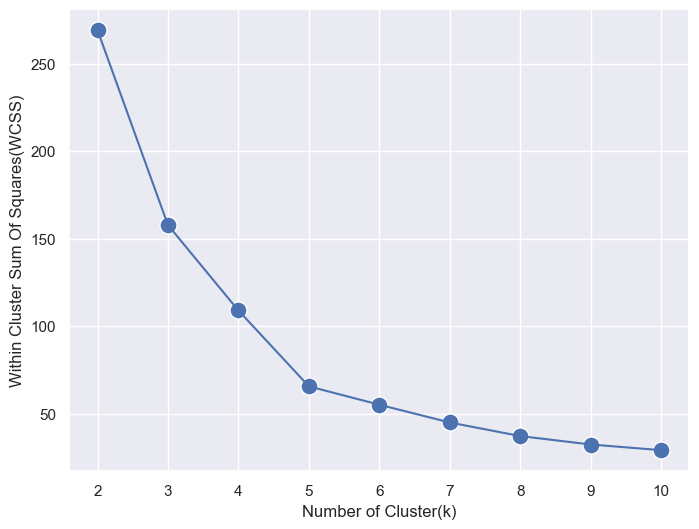

In [50]:
# Within Cluster Sum of Squares (WCSS) method
wcss = []
for k in range(2,11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)
    
wcss_series = pd.Series(wcss, index =  range(2, 11))

plt.figure(figsize=(8,6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y= wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Cluster(k)',
            ylabel = 'Within Cluster Sum Of Squares(WCSS)')

In [ ]:
#The plot suggests the right value for k is 5 as elbow or point of infliction(for now)

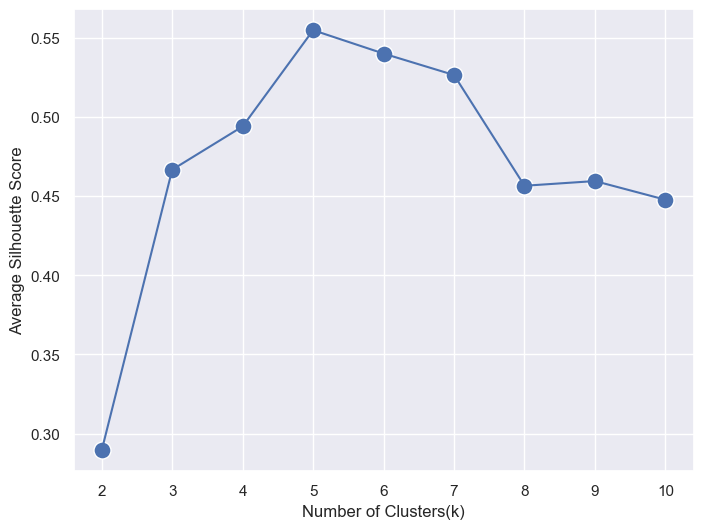

In [51]:
#Average Silhouette Score
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))
    
silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters(k)', 
            ylabel = 'Average Silhouette Score')

In [ ]:
# k value corresponding to the highest value would be the optimal(k is 5)

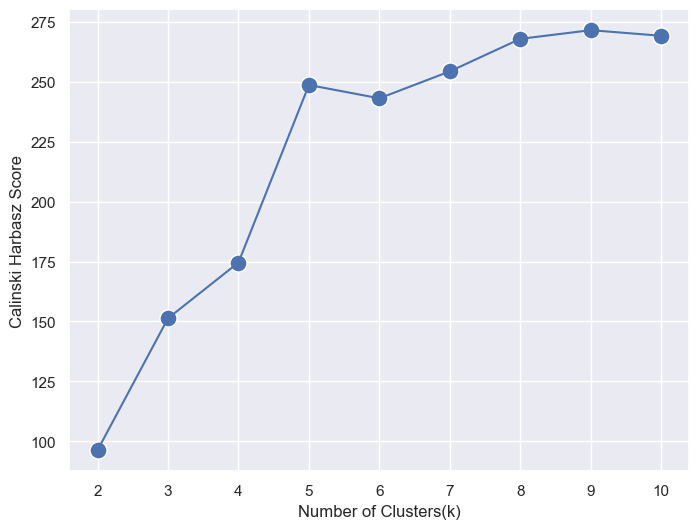

In [53]:
#The Calinski Harbasz Score
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))
    
calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters(k)', 
            ylabel = 'Calinski Harbasz Score')

In [ ]:
# First abrupt elbow is 5 which would be optimal k value(k = 5)

In [ ]:
##Analyze and Interpret the Clusters with new K value

In [54]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [55]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])

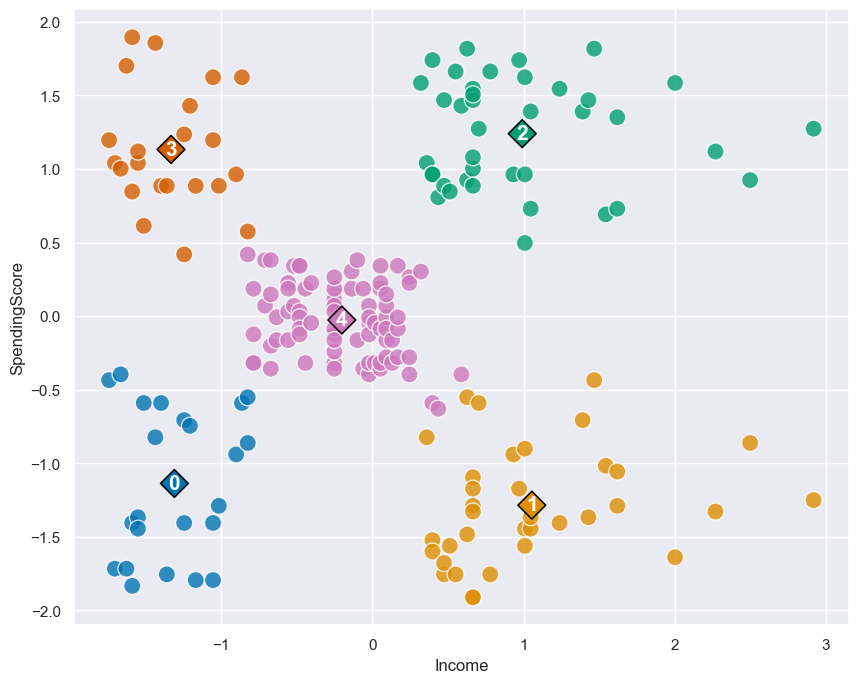

In [56]:
plt.figure(figsize=(10, 8))

#plot the clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     palette= 'colorblind',
                     alpha = 0.8,
                     s = 150,
                     legend= False)

#plt the centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     palette= 'colorblind',
                     marker = 'D',
                     s = 200,
                     ec = 'black',
                     legend= False)

# Add centroid labels
for i in range (len(cluster_centers)):
    plt.text(x = cluster_centers.Income[i],
         y = cluster_centers.SpendingScore[i],
         s = i,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             size = 15,
             weight = 'bold',
             color = 'white')

In [58]:
# We assign the cluster numbers into customer's data
customers['cluster'] = km.labels_.tolist()
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore,cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0


In [63]:
# We dummy code the only categorical feature in our dataset
customers =  pd.get_dummies(customers, columns = ['Gender'])
customers.head()

,CustomerID,Age,Income,SpendingScore,cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0


In [65]:
customers.agg({
    'Gender_Female' : 'mean',
    'Gender_Male' : 'mean',
    'Age' : 'median',
    'Income' : 'median',
    'SpendingScore' :  'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [ ]:
# Median age, median income, median spending score

In [66]:
#Now descriptive statistics grouped by clusters
customers.groupby('cluster').agg({
    'Gender_Female' : 'mean',
    'Gender_Male' : 'mean',
    'Age' : 'median',
    'Income' : 'median',
    'SpendingScore' :  'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0


In [67]:
# cluster 0 - older, earn less, spend less
# cluster 1 - more male, older than avg, earn more and spend less than avg
# cluster 2 - younger than avg, earn and spend more than avg
# cluster 3 - younger, earn less and spend more
# cluster 4 - older than avg, earn less than avg but have avg spending score

In [ ]:
# Invest more in Cluster 1 customers, make Cluster 2 customers happy, and keep an eye on other Clusters